In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import calendar
import datetime

cleaning creators table

In [2]:
creator=pd.read_excel('/content/Crowdfunding_Creator.xlsx')

In [3]:
creator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334841 entries, 0 to 334840
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               334841 non-null  int64 
 1   name             334826 non-null  object
 2   chosen_currency  732 non-null     object
dtypes: int64(1), object(2)
memory usage: 7.7+ MB


In [4]:
creator.head()

,id,name,chosen_currency
0,48480,Robert Maehre (deleted),NaN
1,383340,Holly (deleted),NaN
2,463486,Robert Deusser,NaN
3,582581,"StoryShed Media, Michael Maupin (deleted)",NaN
4,905479,Mason Peterson (deleted),NaN


In [5]:
creator['active_names']=(creator['name']
                         .mask(creator['name']
                               .str
                               .contains('(deleted)',
                                         na=False),
                               ''))

creator['deleted_names']=(creator['name']
                          .where(creator['name']
                                 .str
                                 .contains('(deleted)',
                                           na=False),
                                 ''))

creator['deleted_names']=(creator['deleted_names']
                          .str
                          .split('(',
                                 expand=True)
                          [0])

creator.head()

/tmp/ipython-input-5-612821579.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  .contains('(deleted)',
/tmp/ipython-input-5-612821579.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  .contains('(deleted)',


,id,name,chosen_currency,active_names,deleted_names
0,48480,Robert Maehre (deleted),NaN,,Robert Maehre
1,383340,Holly (deleted),NaN,,Holly
2,463486,Robert Deusser,NaN,Robert Deusser,
3,582581,"StoryShed Media, Michael Maupin (deleted)",NaN,,"StoryShed Media, Michael Maupin"
4,905479,Mason Peterson (deleted),NaN,,Mason Peterson


In [6]:
creator.drop(columns='name',
             inplace=True)
creator.head()

,id,chosen_currency,active_names,deleted_names
0,48480,NaN,,Robert Maehre
1,383340,NaN,,Holly
2,463486,NaN,Robert Deusser,
3,582581,NaN,,"StoryShed Media, Michael Maupin"
4,905479,NaN,,Mason Peterson


cleaning category table

In [7]:
category=pd.read_excel('/content/crowdfunding_Category.xlsx')

In [8]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         169 non-null    int64  
 1   name       169 non-null    object 
 2   parent_id  154 non-null    float64
 3   position   169 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.4+ KB


In [9]:
category.head()

,id,name,parent_id,position
0,354,Taxidermy,26.0,12
1,347,Glass,26.0,5
2,352,Quilts,26.0,10
3,336,Flight,16.0,6
4,255,Residencies,6.0,2


cleaning location table

In [10]:
location=pd.read_excel('/content/Crowdfunding_Location.xlsx')
country=pd.read_excel('/content/COUNTRY CODES.xlsx',
                      header=1)

In [11]:
country.head()

,Country_Code,Full_Country_Name
0,US,United States
1,GB,United Kingdom
2,FI,Finland
3,BE,Belgium
4,PL,Poland


In [12]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23252 entries, 0 to 23251
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                23252 non-null  int64 
 1   displayable_name  23252 non-null  object
 2   type              23252 non-null  object
 3   name              23252 non-null  object
 4   state             23225 non-null  object
 5   short_name        23252 non-null  object
 6   is_root           23252 non-null  int64 
 7   country           23246 non-null  object
 8   localized_name    10354 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [13]:
location.head()

,id,displayable_name,type,name,state,short_name,is_root,country,localized_name
0,2351708,"Accord, NY",Town,Accord,NY,"Accord, NY",0,US,NaN
1,2351910,"Adams Center, NY",Town,Adams Center,NY,"Adams Center, NY",0,US,NaN
2,2352490,"Akron, NY",Town,Akron,NY,"Akron, NY",0,US,NaN
3,2353035,"Alexandria Bay, NY",Town,Alexandria Bay,NY,"Alexandria Bay, NY",0,US,NaN
4,2353076,"Alfred, NY",Town,Alfred,NY,"Alfred, NY",0,US,NaN


In [14]:
location.drop(columns=['name',
                       'state',
                       'short_name',
                       'is_root',
                       'localized_name'],
              inplace=True)
location

,id,displayable_name,type,country
0,2351708,"Accord, NY",Town,US
1,2351910,"Adams Center, NY",Town,US
2,2352490,"Akron, NY",Town,US
3,2353035,"Alexandria Bay, NY",Town,US
4,2353076,"Alfred, NY",Town,US
...,...,...,...,...
23247,2488828,"Santa Barbara, CA",Town,US
23248,2373505,"Camarillo, CA",Town,US
23249,2442047,"Los Angeles, CA",Town,US
23250,2382067,"Clovis, CA",Town,US


In [15]:
location=location.merge(country,
                        how='left',
                        left_on='country',
                        right_on='Country_Code')

location.head()

,id,displayable_name,type,country,Country_Code,Full_Country_Name
0,2351708,"Accord, NY",Town,US,US,United States
1,2351910,"Adams Center, NY",Town,US,US,United States
2,2352490,"Akron, NY",Town,US,US,United States
3,2353035,"Alexandria Bay, NY",Town,US,US,United States
4,2353076,"Alfred, NY",Town,US,US,United States


In [16]:
location.drop(columns=['country',
                       'Country_Code']
              ,inplace=True)
location

,id,displayable_name,type,Full_Country_Name
0,2351708,"Accord, NY",Town,United States
1,2351910,"Adams Center, NY",Town,United States
2,2352490,"Akron, NY",Town,United States
3,2353035,"Alexandria Bay, NY",Town,United States
4,2353076,"Alfred, NY",Town,United States
...,...,...,...,...
23247,2488828,"Santa Barbara, CA",Town,United States
23248,2373505,"Camarillo, CA",Town,United States
23249,2442047,"Los Angeles, CA",Town,United States
23250,2382067,"Clovis, CA",Town,United States


In [17]:
location['city']=location['displayable_name'].str[:-4]

location['state']=location['displayable_name'].str[-2:]

location.head()

,id,displayable_name,type,Full_Country_Name,city,state
0,2351708,"Accord, NY",Town,United States,Accord,NY
1,2351910,"Adams Center, NY",Town,United States,Adams Center,NY
2,2352490,"Akron, NY",Town,United States,Akron,NY
3,2353035,"Alexandria Bay, NY",Town,United States,Alexandria Bay,NY
4,2353076,"Alfred, NY",Town,United States,Alfred,NY


In [18]:
location['state']=(location['state']
                   .where(location['state']
                          .str
                          .isupper(),
                          ''))

location.head()

,id,displayable_name,type,Full_Country_Name,city,state
0,2351708,"Accord, NY",Town,United States,Accord,NY
1,2351910,"Adams Center, NY",Town,United States,Adams Center,NY
2,2352490,"Akron, NY",Town,United States,Akron,NY
3,2353035,"Alexandria Bay, NY",Town,United States,Alexandria Bay,NY
4,2353076,"Alfred, NY",Town,United States,Alfred,NY


In [19]:
location.drop(columns=['displayable_name']
              ,inplace=True)
location.head()

,id,type,Full_Country_Name,city,state
0,2351708,Town,United States,Accord,NY
1,2351910,Town,United States,Adams Center,NY
2,2352490,Town,United States,Akron,NY
3,2353035,Town,United States,Alexandria Bay,NY
4,2353076,Town,United States,Alfred,NY


crowdfunding cleaning


In [20]:
crowdfunding=pd.read_excel('/content/Crowdfunding_projects_1.xlsx')

In [21]:
crowdfunding.head()

,id,state,name,country,creator_id,location_id,category_id,created_at,deadline,updated_at,...,currency,currency_symbol,usd_pledged,static_usd_rate,backers_count,spotlight,staff_pick,blurb,currency_trailing_code,disable_communication
0,24080365,failed,Feature Film: The Wolfes,US,1439247114,2488042.0,293,1485972639,1488571200,1488571201,...,USD,$,0.0,1.0,0,0,0,My film is about a boy who discovers the truth...,1,0
1,27131878,failed,BarBQ 4REAL,US,680525996,2466256.0,10,1427846948,1430507319,1430507320,...,USD,$,0.0,1.0,0,0,0,#Try our BBQ It's 4REAL,1,0
2,30525634,failed,Down on the Street,US,222229854,2458410.0,276,1457479696,1460073915,1460073915,...,USD,$,0.0,1.0,0,0,0,Welcome to Down on the Street. A proposed exhi...,1,0
3,31977817,failed,Descent into Madness-Stream of Conscious Endur...,US,1978657574,2523194.0,48,1343252842,1346342564,1397791317,...,USD,$,0.0,1.0,0,0,0,"Endurance writing for 72 hours, watch an autho...",1,0
4,33517733,failed,Help us add more content and deliver it faster!,US,1016683395,2433227.0,18,1427808214,1428676182,1428676219,...,USD,$,0.0,1.0,0,0,0,We need to upgrade our technology to create a ...,1,0


In [22]:
crowdfunding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365892 entries, 0 to 365891
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      365892 non-null  int64  
 1   state                   365892 non-null  object 
 2   name                    365842 non-null  object 
 3   country                 365892 non-null  object 
 4   creator_id              365892 non-null  int64  
 5   location_id             364378 non-null  float64
 6   category_id             365892 non-null  int64  
 7   created_at              365892 non-null  int64  
 8   deadline                365892 non-null  int64  
 9   updated_at              365892 non-null  int64  
 10  state_changed_at        365892 non-null  int64  
 11  successful_at           140313 non-null  float64
 12  launched_at             365892 non-null  int64  
 13  goal                    365892 non-null  float64
 14  pledged             

In [23]:
crowdfunding=(crowdfunding
              .merge(country,
                     how='left',
                     left_on='country',
                     right_on='Country_Code'))

crowdfunding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365892 entries, 0 to 365891
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      365892 non-null  int64  
 1   state                   365892 non-null  object 
 2   name                    365842 non-null  object 
 3   country                 365892 non-null  object 
 4   creator_id              365892 non-null  int64  
 5   location_id             364378 non-null  float64
 6   category_id             365892 non-null  int64  
 7   created_at              365892 non-null  int64  
 8   deadline                365892 non-null  int64  
 9   updated_at              365892 non-null  int64  
 10  state_changed_at        365892 non-null  int64  
 11  successful_at           140313 non-null  float64
 12  launched_at             365892 non-null  int64  
 13  goal                    365892 non-null  float64
 14  pledged             

In [24]:
crowdfunding.drop(columns=['country',
                           'currency',
                           'currency_symbol',
                           'blurb',
                           'currency_trailing_code',
                           'Country_Code'],
                  inplace=True)

crowdfunding.head()

,id,state,name,creator_id,location_id,category_id,created_at,deadline,updated_at,state_changed_at,...,launched_at,goal,pledged,usd_pledged,static_usd_rate,backers_count,spotlight,staff_pick,disable_communication,Full_Country_Name
0,24080365,failed,Feature Film: The Wolfes,1439247114,2488042.0,293,1485972639,1488571200,1488571201,1488571201,...,1485977434,5000.0,0.0,0.0,1.0,0,0,0,0,United States
1,27131878,failed,BarBQ 4REAL,680525996,2466256.0,10,1427846948,1430507319,1430507320,1430507320,...,1427915319,5000.0,0.0,0.0,1.0,0,0,0,0,United States
2,30525634,failed,Down on the Street,222229854,2458410.0,276,1457479696,1460073915,1460073915,1460073915,...,1457485515,5000.0,0.0,0.0,1.0,0,0,0,0,United States
3,31977817,failed,Descent into Madness-Stream of Conscious Endur...,1978657574,2523194.0,48,1343252842,1346342564,1397791317,1346342564,...,1343750564,5000.0,0.0,0.0,1.0,0,0,0,0,United States
4,33517733,failed,Help us add more content and deliver it faster!,1016683395,2433227.0,18,1427808214,1428676182,1428676219,1428676219,...,1427812182,5000.0,0.0,0.0,1.0,0,0,0,0,United States


In [25]:
dates=['created_at','deadline','updated_at',
       'state_changed_at','successful_at','launched_at']

for x in dates:
  crowdfunding[x]=pd.to_datetime(crowdfunding[x],unit='s')

for x in dates:
  crowdfunding[x]=crowdfunding[x].dt.date

crowdfunding.head()

,id,state,name,creator_id,location_id,category_id,created_at,deadline,updated_at,state_changed_at,...,launched_at,goal,pledged,usd_pledged,static_usd_rate,backers_count,spotlight,staff_pick,disable_communication,Full_Country_Name
0,24080365,failed,Feature Film: The Wolfes,1439247114,2488042.0,293,2017-02-01,2017-03-03,2017-03-03,2017-03-03,...,2017-02-01,5000.0,0.0,0.0,1.0,0,0,0,0,United States
1,27131878,failed,BarBQ 4REAL,680525996,2466256.0,10,2015-04-01,2015-05-01,2015-05-01,2015-05-01,...,2015-04-01,5000.0,0.0,0.0,1.0,0,0,0,0,United States
2,30525634,failed,Down on the Street,222229854,2458410.0,276,2016-03-08,2016-04-08,2016-04-08,2016-04-08,...,2016-03-09,5000.0,0.0,0.0,1.0,0,0,0,0,United States
3,31977817,failed,Descent into Madness-Stream of Conscious Endur...,1978657574,2523194.0,48,2012-07-25,2012-08-30,2014-04-18,2012-08-30,...,2012-07-31,5000.0,0.0,0.0,1.0,0,0,0,0,United States
4,33517733,failed,Help us add more content and deliver it faster!,1016683395,2433227.0,18,2015-03-31,2015-04-10,2015-04-10,2015-04-10,...,2015-03-31,5000.0,0.0,0.0,1.0,0,0,0,0,United States


In [26]:
crowdfunding['adjusted_pledged']= (crowdfunding['static_usd_rate']*crowdfunding['pledged'])

crowdfunding.head()

,id,state,name,creator_id,location_id,category_id,created_at,deadline,updated_at,state_changed_at,...,goal,pledged,usd_pledged,static_usd_rate,backers_count,spotlight,staff_pick,disable_communication,Full_Country_Name,adjusted_pledged
0,24080365,failed,Feature Film: The Wolfes,1439247114,2488042.0,293,2017-02-01,2017-03-03,2017-03-03,2017-03-03,...,5000.0,0.0,0.0,1.0,0,0,0,0,United States,0.0
1,27131878,failed,BarBQ 4REAL,680525996,2466256.0,10,2015-04-01,2015-05-01,2015-05-01,2015-05-01,...,5000.0,0.0,0.0,1.0,0,0,0,0,United States,0.0
2,30525634,failed,Down on the Street,222229854,2458410.0,276,2016-03-08,2016-04-08,2016-04-08,2016-04-08,...,5000.0,0.0,0.0,1.0,0,0,0,0,United States,0.0
3,31977817,failed,Descent into Madness-Stream of Conscious Endur...,1978657574,2523194.0,48,2012-07-25,2012-08-30,2014-04-18,2012-08-30,...,5000.0,0.0,0.0,1.0,0,0,0,0,United States,0.0
4,33517733,failed,Help us add more content and deliver it faster!,1016683395,2433227.0,18,2015-03-31,2015-04-10,2015-04-10,2015-04-10,...,5000.0,0.0,0.0,1.0,0,0,0,0,United States,0.0


In [27]:
crowdfunding.drop(columns=['static_usd_rate',
                           'pledged'],
                  inplace=True)
crowdfunding.head()

,id,state,name,creator_id,location_id,category_id,created_at,deadline,updated_at,state_changed_at,successful_at,launched_at,goal,usd_pledged,backers_count,spotlight,staff_pick,disable_communication,Full_Country_Name,adjusted_pledged
0,24080365,failed,Feature Film: The Wolfes,1439247114,2488042.0,293,2017-02-01,2017-03-03,2017-03-03,2017-03-03,NaT,2017-02-01,5000.0,0.0,0,0,0,0,United States,0.0
1,27131878,failed,BarBQ 4REAL,680525996,2466256.0,10,2015-04-01,2015-05-01,2015-05-01,2015-05-01,NaT,2015-04-01,5000.0,0.0,0,0,0,0,United States,0.0
2,30525634,failed,Down on the Street,222229854,2458410.0,276,2016-03-08,2016-04-08,2016-04-08,2016-04-08,NaT,2016-03-09,5000.0,0.0,0,0,0,0,United States,0.0
3,31977817,failed,Descent into Madness-Stream of Conscious Endur...,1978657574,2523194.0,48,2012-07-25,2012-08-30,2014-04-18,2012-08-30,NaT,2012-07-31,5000.0,0.0,0,0,0,0,United States,0.0
4,33517733,failed,Help us add more content and deliver it faster!,1016683395,2433227.0,18,2015-03-31,2015-04-10,2015-04-10,2015-04-10,NaT,2015-03-31,5000.0,0.0,0,0,0,0,United States,0.0


calendar table

In [28]:
min_date=(crowdfunding[dates]
          .stack()
          .min())

max_date=(crowdfunding[dates]
          .stack()
          .max())

all_dates=(pd.date_range(start=min_date,
                         end=max_date,
                         freq='D'))

calendar=(pd.DataFrame({'dates':all_dates}))

calendar

,dates
0,2009-04-21
1,2009-04-22
2,2009-04-23
3,2009-04-24
4,2009-04-25
...,...
3627,2019-03-27
3628,2019-03-28
3629,2019-03-29
3630,2019-03-30


In [29]:
calendar['day']=calendar['dates'].dt.day
calendar['month']=calendar['dates'].dt.month
calendar['year']=calendar['dates'].dt.year
calendar['month name']=calendar['dates'].dt.month_name()
calendar['quarter']=calendar['dates'].dt.quarter
calendar['weekday']=calendar['dates'].dt.weekday
calendar['day_name']=calendar['dates'].dt.day_name()
calendar['year_month']=calendar['dates'].dt.strftime('%Y-%b')
calendar['financial_month']=((calendar['month']-4+12)%12+1)
calendar['financial_quarter']=((calendar['financial_month']-1)//3)+1
calendar

,dates,day,month,year,month name,quarter,weekday,day_name,year_month,financial_month,financial_quarter
0,2009-04-21,21,4,2009,April,2,1,Tuesday,2009-Apr,1,1
1,2009-04-22,22,4,2009,April,2,2,Wednesday,2009-Apr,1,1
2,2009-04-23,23,4,2009,April,2,3,Thursday,2009-Apr,1,1
3,2009-04-24,24,4,2009,April,2,4,Friday,2009-Apr,1,1
4,2009-04-25,25,4,2009,April,2,5,Saturday,2009-Apr,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3627,2019-03-27,27,3,2019,March,1,2,Wednesday,2019-Mar,12,4
3628,2019-03-28,28,3,2019,March,1,3,Thursday,2019-Mar,12,4
3629,2019-03-29,29,3,2019,March,1,4,Friday,2019-Mar,12,4
3630,2019-03-30,30,3,2019,March,1,5,Saturday,2019-Mar,12,4


exploratory data analysis

        state  number_of_projects
0        live                3163
1  successful              140313
2    canceled               32498
3   suspended                1501
4      failed              188239
5      purged                 178


Text(0, 0.5, 'number of projects')

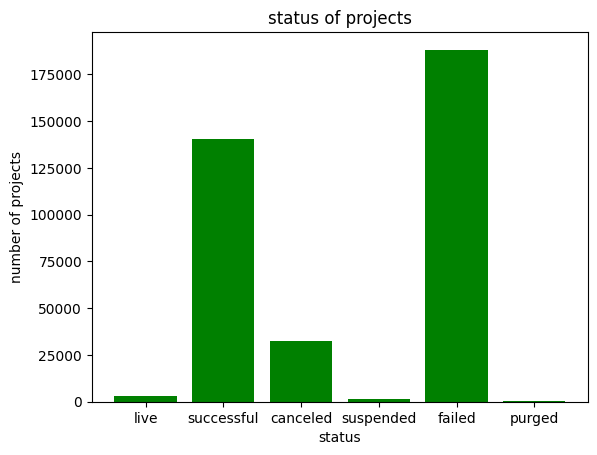

In [30]:
custom_order = ['live', 'successful', 'canceled',
                'suspended', 'failed', 'purged']

status_number_of_project=(crowdfunding
                          .groupby('state')['id']
                          .count()
                          .reset_index())
status_number_of_project=(status_number_of_project
                          .set_index('state')
                          .reindex(custom_order)
                          .reset_index())
status_number_of_project.rename(columns={'id':'number_of_projects'},
                                inplace=True)
print(status_number_of_project)

status_number_of_project_bar=plt.bar(
    status_number_of_project['state'],
    status_number_of_project['number_of_projects'],
     color='green')
plt.title('status of projects')
plt.xlabel('status')
plt.ylabel('number of projects')

   Full_Country_Name      id
21     United States  278524
20    United Kingdom   34074
3             Canada   14774
0          Australia    7757
6            Germany    4714
5             France    3532
9              Italy    3374
13       Netherlands    2836
17             Spain    2737
12            Mexico    2677


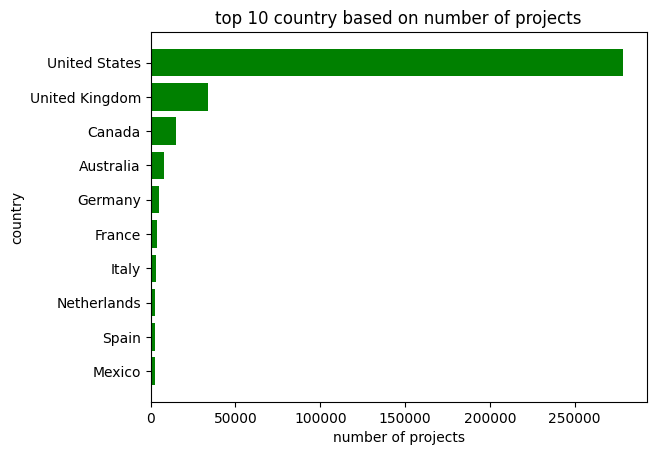

In [31]:
location_number_of_project=(crowdfunding
                            .groupby('Full_Country_Name')['id']
                            .count()
                            .reset_index()
                            .sort_values('id',
                                         ascending=False)
                            [:10])
print(location_number_of_project)

location_number_of_project_barh=plt.barh(
    location_number_of_project['Full_Country_Name'],
  location_number_of_project['id'],
  color='green')
plt.title('top 10 country based on number of projects')
plt.xlabel('number of projects')
plt.ylabel('country')
plt.gca().invert_yaxis()

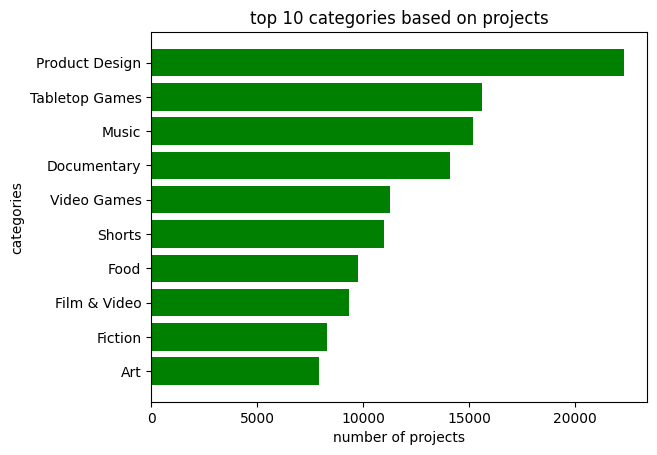

In [32]:
category_number_of_project=(crowdfunding
                            .groupby('category_id')['id']
                            .count()
                            .reset_index()
                            .sort_values('id',
                                         ascending=False)
                            [:10])

category_number_of_project=(category_number_of_project
                            .merge(category,
                                   how='left',
                                   left_on='category_id',
                                   right_on='id'))
category_number_of_project.rename(columns={'id_x':'number_of_projects'},
                                  inplace=True)
category_number_of_project[['name','number_of_projects']]

category_number_of_project_barh=plt.barh(
  category_number_of_project['name'],
  category_number_of_project['number_of_projects'],
  color='green')
plt.title('top 10 categories based on projects')
plt.xlabel('number of projects')
plt.ylabel('categories')
plt.gca().invert_yaxis()

    year  number of projects
0   2009                1310
1   2010                9835
2   2011               24359
3   2012               39216
4   2013               41556
5   2014               59155
6   2015               58104
7   2016               46158
8   2017               47270
9   2018               37410
10  2019                1519


Text(0, 0.5, 'number of projects')

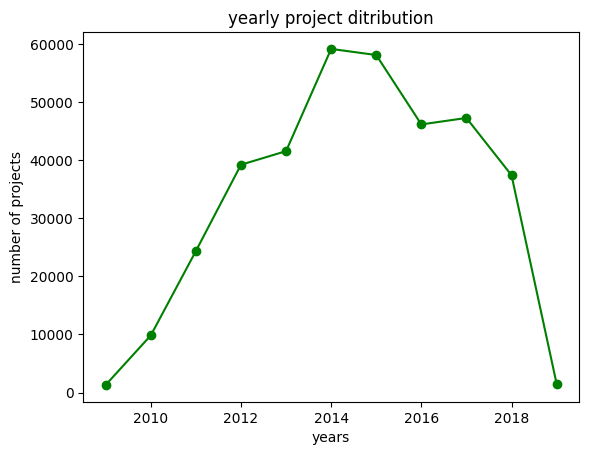

In [33]:
crowdfunding['created_at']=(pd.to_datetime(crowdfunding['created_at']).dt
                            .normalize())
calendar['dates']=pd.to_datetime(calendar['dates']).dt.normalize()

yearly_number_of_projects=(crowdfunding
                           .merge(calendar[['dates','year','month','quarter']]
                                  ,how='left'
                                  ,left_on='created_at'
                                  ,right_on='dates'))
yearly_number_of_projects.rename(columns={'id':'number of projects'}
                                 ,inplace=True)

yearly_number_of_projects=(yearly_number_of_projects
                           .groupby('year')
                           ['number of projects']
                           .count()
                           .reset_index()
                           .sort_values('year',
                                        ascending=True))

print(yearly_number_of_projects)

yearly_number_of_projects=plt.plot(yearly_number_of_projects['year'],
                                   yearly_number_of_projects['number of projects'],
                                   color='green',
                                   marker='o')
plt.title('yearly project ditribution')
plt.xlabel('years')
plt.ylabel('number of projects')

   month name  number of projects
4     January               31161
3    February               28814
7       March               33406
0       April               30939
8         May               32087
6        June               29740
5        July               36101
1      August               31686
11  September               30269
10    October               31386
9    November               28316
2    December               21987


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

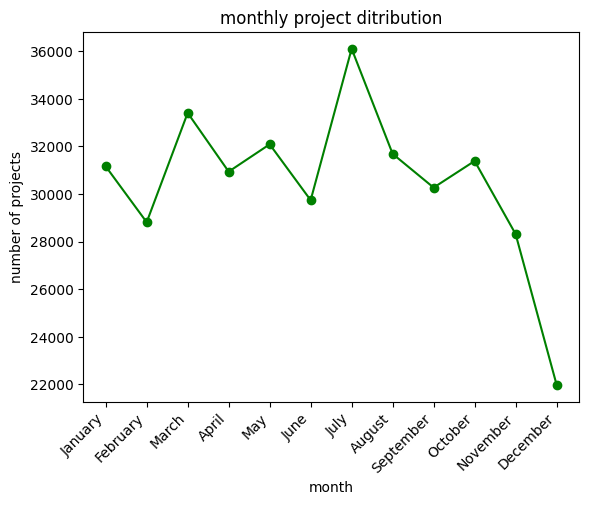

In [34]:
crowdfunding['created_at']=(pd.to_datetime(crowdfunding['created_at']).dt
                            .normalize())
calendar['dates']=pd.to_datetime(calendar['dates']).dt.normalize()
monthly_number_of_projects=(crowdfunding
                            .merge(calendar[['dates','year','month','month name']]
                                   ,how='left'
                                   ,left_on='created_at'
                                   ,right_on='dates'))
monthly_number_of_projects.rename(columns={'id':'number of projects'}
                                  ,inplace=True)

monthly_number_of_projects=(monthly_number_of_projects
                            .groupby(['month name','month'])
                            ['number of projects']
                            .count()
                            .reset_index()
                            .sort_values('month',
                                         ascending=True))
print(monthly_number_of_projects[['month name',
                                  'number of projects']])

monthly_number_of_projects=plt.plot(monthly_number_of_projects['month name'],
                                   monthly_number_of_projects['number of projects'],
                                   color='green',
                                   marker='o')
plt.title('monthly project ditribution')
plt.xlabel('month')
plt.ylabel('number of projects')
plt.xticks(rotation=45,ha='right')

In [35]:
successful_usd_pledged=((crowdfunding[crowdfunding['state']=='successful']
 ['usd_pledged']
                         .sum())/1000000).round(2)
successful_backers_count=((crowdfunding[crowdfunding['state']=='successful']['backers_count']
                           .sum())/1000000).round(2)
print('amount pledged for successful projects => $ ',successful_usd_pledged, ' million')
print('number of backers for successful projects => ',successful_backers_count, 'million')

amount pledged for successful projects => $  3479.48  million
number of backers for successful projects =>  39.97 million


In [52]:
crowdfunding['launched_at']=pd.to_datetime(crowdfunding['launched_at']
                                           , errors='coerce')
crowdfunding['successful_at']=pd.to_datetime(crowdfunding['successful_at']
                                             , errors='coerce')
successful_project_duration=(crowdfunding[(crowdfunding['state']=='successful')
&(crowdfunding['launched_at'].notna())
&(crowdfunding['successful_at'].notna())].copy())
successful_project_duration['duration']=(successful_project_duration['successful_at']-
                                         successful_project_duration['launched_at']).dt.days
successful_project_duration

average_duration_successful = successful_project_duration['duration'].mean().round(2)
print('average duration of projects are => ',average_duration_successful,' days')


average duration of projects are =>  31.9  days


In [38]:
crowdfunding[['name','usd_pledged']].sort_values('usd_pledged',
                                                 ascending=False)[:10]

,name,usd_pledged
257951,"Pebble Time - Awesome Smartwatch, No Compromises",20338986.27
252760,COOLEST COOLER: 21st Century Cooler that's Act...,13285226.36
255265,"Pebble 2, Time 2 + All-New Pebble Core",12779843.49
251982,Kingdom Death: Monster 1.5,12393139.69
236903,Pebble: E-Paper Watch for iPhone and Android,10266845.74
258314,The World's Best TRAVEL JACKET with 15 Feature...,9192055.66
247393,Exploding Kittens,8782571.99
355877,OUYA: A New Kind of Video Game Console,8596474.58
246519,"THE 7th CONTINENT – What Goes Up, Must Come Down.",7072757.00
253297,"The Everyday Backpack, Tote, and Sling",6565782.50


In [39]:
crowdfunding[['name','backers_count']].sort_values('backers_count',
                                                   ascending=False)[:10]

,name,backers_count
247393,Exploding Kittens,219382
252927,Fidget Cube: A Vinyl Desk Toy,154926
256331,"Bring Reading Rainbow Back for Every Child, Ev...",105857
351287,The Veronica Mars Movie Project,91585
250606,Double Fine Adventure,87142
254217,Bears vs Babies - A Card Game,85581
257951,"Pebble Time - Awesome Smartwatch, No Compromises",78471
247861,Torment: Tides of Numenera,74405
247034,Project Eternity,73986
241190,Yooka-Laylee - A 3D Platformer Rare-vival!,73206


In [40]:
top_10_backers = crowdfunding.nlargest(10,
                                       'backers_count')[['name',
                                                         'backers_count']]
print(top_10_backers)

                                                     name  backers_count
247393                                  Exploding Kittens         219382
252927                      Fidget Cube: A Vinyl Desk Toy         154926
256331  Bring Reading Rainbow Back for Every Child, Ev...         105857
351287                    The Veronica Mars Movie Project          91585
250606                              Double Fine Adventure          87142
254217                      Bears vs Babies - A Card Game          85581
257951   Pebble Time - Awesome Smartwatch, No Compromises          78471
247861                         Torment: Tides of Numenera          74405
247034                                   Project Eternity          73986
241190         Yooka-Laylee - A 3D Platformer Rare-vival!          73206


In [41]:
total_projects=crowdfunding['id'].count()

successfull_project=(crowdfunding[crowdfunding['state']=='successful']['id']
                     .count())

successfull_percent=((successfull_project*100)/total_projects).round(2)
print('success % => ',successfull_percent,' %')

success % =>  38.35  %


       category_name  total  success  percent
21          Chiptune     38       29    76.32
122      Residencies     73       54    73.97
6        Anthologies    960      673    70.10
36             Dance   2084     1365    65.50
72        Indie Rock   5078     3313    65.24
30    Country & Folk   4246     2701    63.61
23   Classical Music   2454     1559    63.53
99      Performances   1018      643    63.16
141          Theater   6236     3927    62.97
136   Tabletop Games  15618     9749    62.42


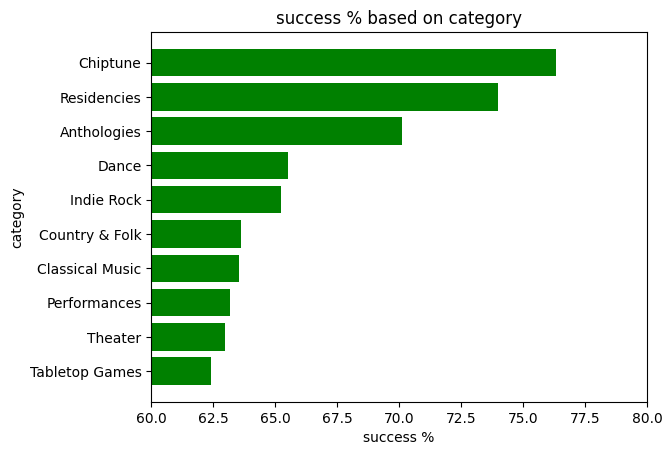

In [53]:
category_projects=crowdfunding.merge(category,
                                     how='left',
                                     left_on='category_id',
                                     right_on='id')
category_projects.rename(columns={'name_y':'category_name',
                                  'id_x':'id'},inplace=True)

total_category_projects=(category_projects
                         .groupby('category_name')['id']
                         .count()
                         .reset_index())
total_category_projects

successfull_category_project=(category_projects
 [category_projects['state']=='successful']
                              .groupby('category_name')['id']
                              .count()
                              .reset_index())
successfull_category_project

category_success_percent=total_category_projects.merge(successfull_category_project
                                                       ,how='left'
                                                       ,on='category_name')
category_success_percent.rename(columns={'id_x':'total',
                                         'id_y':'success'},inplace=True)

category_success_percent['percent']=(category_success_percent['success']*100
                                     /category_success_percent['total']).round(2)

print(category_success_percent.sort_values('percent',
                                           ascending=False)[:10])

top_10_category=category_success_percent.sort_values('percent',
                                                     ascending=False)[:10]

top_10_category_barh=plt.barh(top_10_category['category_name'],
                              top_10_category['percent'],
                              color='green')
plt.title('success % based on category')
plt.xlabel('success %')
plt.ylabel('category')
plt.xlim(60,80)
plt.gca().invert_yaxis()

    year  total  success  percentage
0   2009   1172      505       43.09
1   2010   9186     3955       43.05
2   2011  22968    10465       45.56
3   2012  35884    15486       43.16
4   2013  39842    17550       44.05
5   2014  58814    19284       32.79
6   2015  59346    18717       31.54
7   2016  46809    16639       35.55
8   2017  48112    18897       39.28
9   2018  40772    18675       45.80
10  2019   2987      140        4.69


Text(0, 0.5, 'success %')

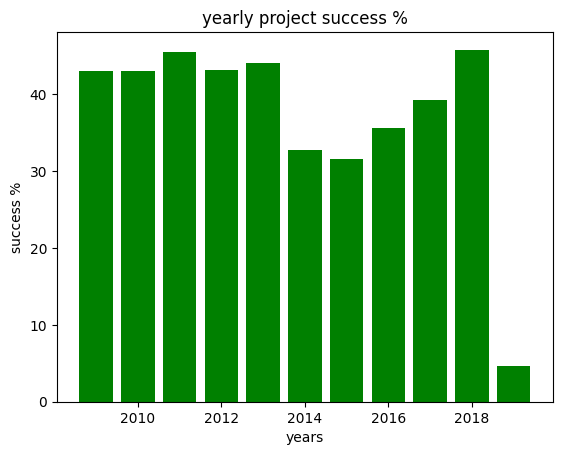

In [63]:
yearly_project=crowdfunding.merge(calendar,
                                  how='left',
                                  left_on='launched_at',
                                  right_on='dates')
yearly_project

yearly_project_total=(yearly_project
                      .groupby('year')['id']
                      .count()
                      .reset_index()
                      .sort_values('year',
                                   ascending=True))
yearly_project_total

yearly_project_success=(yearly_project[yearly_project['state']=='successful']
                        .groupby('year')['id']
                        .count()
                        .reset_index()
                        .sort_values('year',
                                     ascending=True))
yearly_project_success

yearly_project_success_percent=(yearly_project_total
                                .merge(yearly_project_success
                                       ,how='left'
                                       ,on='year'))
yearly_project_success_percent.rename(columns={'id_x':'total',
                                               'id_y':'success'},
                                      inplace=True)

yearly_project_success_percent['percentage']=(yearly_project_success_percent['success']*100
                                              /yearly_project_success_percent['total']).round(2)
print(yearly_project_success_percent)

yearly_project_success_percent_bar=plt.bar(yearly_project_success_percent['year']
                                           ,yearly_project_success_percent['percentage']
                                           ,color='green')
plt.title('yearly project success %')
plt.xlabel('years')
plt.ylabel('success %')

   month name  total  success  percentage
0     January  28779     9999       34.74
1    February  27171    11142       41.01
2       March  32142    13168       40.97
3       April  30137    12404       41.16
4         May  32307    12686       39.27
5        June  31214    12253       39.25
6        July  35151    12193       34.69
7      August  31758    11326       35.66
8   September  30630    11912       38.89
9     October  33511    13303       39.70
10   November  31787    12477       39.25
11   December  21305     7450       34.97


Text(0, 0.5, 'success %')

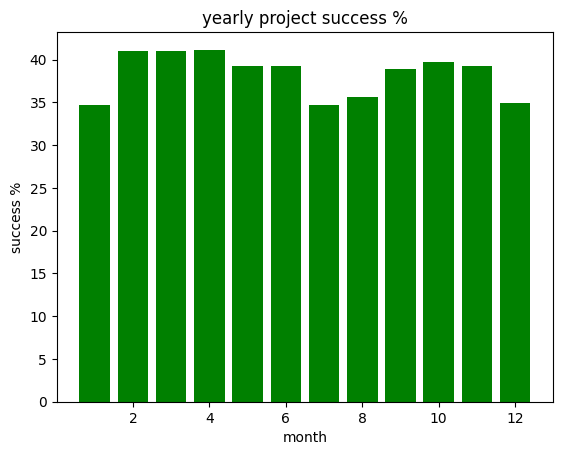

In [67]:
monthly_project=crowdfunding.merge(calendar,
                                  how='left',
                                  left_on='launched_at',
                                  right_on='dates')
monthly_project

monthly_project_total=(monthly_project
                      .groupby(['month','month name'])['id']
                      .count()
                      .reset_index()
                      .sort_values('month',
                                   ascending=True))
monthly_project_total

monthly_project_success=(monthly_project[monthly_project['state']=='successful']
                        .groupby(['month','month name'])['id']
                        .count()
                        .reset_index()
                        .sort_values('month',
                                     ascending=True))
monthly_project_success

monthly_project_success_percent=(monthly_project_total
                                .merge(monthly_project_success
                                       ,how='left'
                                       ,on='month'))
monthly_project_success_percent.rename(columns={'id_x':'total',
                                               'id_y':'success',
                                                'month name_x':'month name'},
                                      inplace=True)

monthly_project_success_percent['percentage']=(monthly_project_success_percent['success']*100
                                              /monthly_project_success_percent['total']).round(2)
print(monthly_project_success_percent[['month name','total','success','percentage']])

monthly_project_success_percent=plt.bar(monthly_project_success_percent['month']
                                           ,monthly_project_success_percent['percentage']
                                           ,color='green')
plt.title('yearly project success %')
plt.xlabel('month')
plt.ylabel('success %')

In [75]:
spotlighted_goal=((crowdfunding[crowdfunding['spotlight']==1]
                   .groupby('spotlight')['goal']
                   .sum())/1000000).round(2)

spotlighted_pledged=((crowdfunding[crowdfunding['spotlight']==1]
                      .groupby('spotlight')['usd_pledged']
                      .sum())/1000000).round(2)

spotlighted_goal_percent=(spotlighted_pledged*100
                          /spotlighted_goal).round(2)

print('goal of spotlighted projects => $ ',spotlighted_goal[1],' million')
print('pledgef on spotlighted projects => $ ',spotlighted_pledged[1],' million')
print('goal acheived => ',spotlighted_goal_percent[1],' %')

goal of spotlighted projects => $  1723.83  million
pledgef on spotlighted projects => $  3479.48  million
goal acheived =>  201.85  %


In [76]:
staff_pick_goal=((crowdfunding[crowdfunding['staff_pick']==1]
                  .groupby('staff_pick')['goal']
                  .sum())/1000000).round(2)

staff_pick_pledged=((crowdfunding[crowdfunding['staff_pick']==1]
                     .groupby('staff_pick')['usd_pledged']
                     .sum())/1000000).round(2)

staff_pick_percent=(staff_pick_pledged*100
                    /staff_pick_goal).round(2)

print('goal of staff picked projects => $ ',staff_pick_goal[1],' million')
print('pledgef on staff picked projects => $ ',staff_pick_pledged[1],' million')
print('goal acheived => ',staff_pick_percent[1],' %')

goal of staff picked projects => $  1229.37  million
pledgef on staff picked projects => $  1800.11  million
goal acheived =>  146.43  %
